# 결정 트리 학습과 시각화

결정 트리 학습

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

결정 트리 시각화

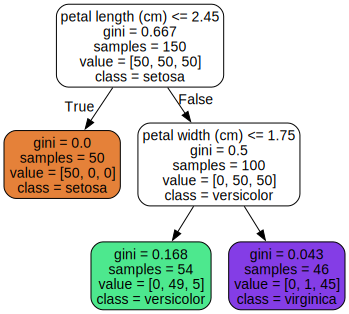

In [2]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

IMAGE_PATH = os.path.join(".", "images")

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGE_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGE_PATH, "iris_tree.dot"))

# 결정 트리로 예측하기

결정 트리는 데이터 전처리가 거의 필요하지 않음

- sample: 해당 노드에 적용된 샘플의 수
- value: 해당 노드에서 각 클래스에 속한 샘플 수의 나열
- gini: 불순도(1개의 클래스만 있다면 불순도는 0, 2개의 이상의 클래스가 있다면 불순도는 0보다 큼)

$G_i = 1 - \overset{n}{\underset{k=1}{\Sigma}}{P_{i,k}}^2$  
여기서 $G_i$는 지니 불순도이고, $P_{i,k}$는 i 노드에 있는 k 클래스에 속한 샘플 비율이다.  
  
i 노드에서 샘플이 2개 이상의 클래스로 분류된다면 ${P_{i,k}}^2$으로 인해 $G_i$는 0보다 커짐

결정 트리는 최대 max_depth 만큼의 깊이로 노드를 만들 수 있음

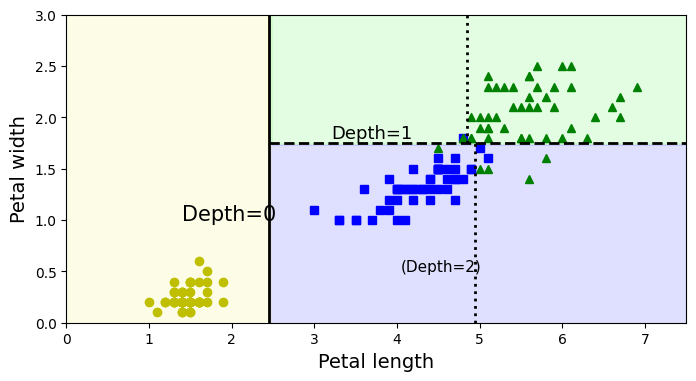

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1 , x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# 클래스 확률 추정

해당 노드의 클래스 별 훈련 샘플 비율을 반환

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

# CART 훈련 알고리즘

훈련 세트를 하나의 특성 k의 임계값 $t_k$를 사용해 두 개의 서브셋으로 나눈다.  

이때, 분류를 위한 CART 비용 함수 $J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac {m_{right}} {m}G_{right}$
를 최소화하는 $k, t_k$를 찾는다.  
- $G_{left}, G_{right}$는 왼쪽, 오른쪽 서브셋의 불순도
- $m_{left}, m_{right}$는 왼쪽, 오른쪽 서브셋의 샘플 수

최대 깊이(max_depth)가 되거나 불순도를 줄이는 분할을 찾을 수 없을 때 서브셋으로 나누는 것을 중지한다.  
min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes 등의 매개변수도 중지 조건에 관여한다.

# 계산 복잡도

결정 트리를 탐색하기 위해서 약 $O(log_2(m))$개의 노드를 거쳐야 하고, 하나의 특성값만 확인하면 되므로 예측에 대한 전체 시간 복잡도는 $O(log_2(m))$이다.

반면, 훈련 복잡도는 모든 특성값을 비교해야 하므로 $n \times O(log_2(m))$이다.  
`presort=True`를 설정하여 훈련 속도를 높일 수 있지만, 훈련 세트가 많으면 속도가 느려진다.

n은 특성의 수, m은 샘플의 수이다.

# 지니 불순도, 엔트로피?

엔트로피 $H_i = -\overset{n}{\underset{k=1, \ \ p_{i,k} \ne 0}{\Sigma}}(p_{i,k}log_2(p_{i,k}))$,  
$p_{i,k}$는 i 노드에 있는 k 클래스에 속한 샘플의 비율

어떤 노드의 세트가 한 클래스의 샘플만 담고 있다면 엔트로피는 0이다.

지니 불순도가 엔트로피보다 계산이 빠르지만 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있다.  
반면, 엔트로피는 균형 잡힌 트리를 만든다.

# 규제 매개변수

훈련되기 전 파라미터 수가 결정되지 않는 모델을 **비파라미터 모델**이라고,  
훈련되기 전 파라미터 수가 결정되는 모델을 **파라미터 모델**이라고 한다.

**결정 트리**는 비파라미터 모델이다.

훈련 데이터에 대한 과대적합을 피하기 위해 결정 트리의 자유도를 제한할 필요가 있다. 즉, 모델을 규제할 필요가 있다. 결정 트리의 규제 매개변수는 알고리즘에 따라 다르지만, 적어도 결정 트리의 최대 깊이(**max_depth**)는 제어할 수 있다. 최대 깊이를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소한다.

제한 없이 결정 트리를 훈련시키고 불필요한 노드를 가지치기(pruning, 제거)하는 **결정 트리의 다른 알고리즘**도 있다.  
순도를 높이는 것이 통계적으로 큰 효과가 없다면 불필요한 노드를 제거한다.  
$\chi^2$ 검정(chi squared test)과 같은 통계적 검정을 사용한다.  

그 외 다른 규제 매개변수가 있다.  
- **min_samples_split**(분할되기 위해 노드가 가져야 하는 최소 샘플 수)
- **min_samples_leaf**(리프 노드가 가지고 있어야 할 최소 샘플 수)
- **min_weight_fraction_leaf**(min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율)
- **max_leaf_nodes**(리프 노드의 최대 수)
- **max_features**(각 노드에서 분할에 사용할 특성의 최대 수)
  
결정 트리 규제 매개변수에서 'min_'으로 시작하는 매개변수를 증가시키거나, 'max_'로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다.

# 회귀

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

회귀에 사용되는 결정트리는 노드의 **타깃값**($y^{(i)}$)들의 평균을 **예측값**($\hat{y}_{node} = \frac{1}{m_{node}} \underset{i \in node}{\Sigma}y^{(i)}$)으로 사용한다.  
또한, **mse**($\underset{i \in node}{\Sigma}{(\hat{y}_{node} - y^{(i)})}^2)$는 타깃값들과 예측값으로 계산한다.

회귀를 위한 CART 비용 함수 $J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac {m_{right}} {m}MSE_{right}$를 최소화 하는 $k, t_K$를 찾는다.


# 불안정성

훈련 세트의 **회전에 민감**하다. 회전 시킨 훈련 세트를 학습하면 회전 시키지 않을 때보다 결정 경계가 구불구불해질 수 있다. 즉, 일반화가 잘 되지 않을 것이다. 이 문제를 해결하는 한 가지 방법은 **PCA 기법**을 사용하는 것이다.

결정 트리는 훈련 데이터에 있는 **작은 변화에도 매우 민감**하다.

**랜덤 포레스트**는 많은 트리에서 만든 예측을 평균하여 이런 불안정성을 극복할 수 있다.